In [45]:
import json
from web3 import Web3

In [46]:
f = open("abi.json")
abi = json.load(f)
f.close()

f = open("bytecode.json")
bytecode_json = json.load(f)
f.close()
bytecode = bytecode_json["object"]


### You will need to make sure Ganache is running and is setup for http://127.0.0.1:8545.
### Also make sure your first account has several ether to run this script

In [47]:
ganache_server = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_server))
web3.isConnected()

True

In [48]:
web3.eth.default_account = web3.eth.accounts[0]

In [49]:
numbers_list=[]

In [27]:
lotto_contract = web3.eth.contract(abi=abi, bytecode=bytecode)
for i in range(0,1000):
    tx_hash = lotto_contract.constructor(web3.eth.default_account, 60).transact()
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    current_contract = web3.eth.contract(address=tx_receipt.contractAddress, abi=abi)
    tx_hash = current_contract.functions.finalize().transact()
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    winning_numbers = current_contract.functions.getWinningNumbers().call()
    numbers_list.append(winning_numbers)

In [28]:
all_numbers = [number for sublist in numbers_list for number in sublist]

In [29]:
numbers_list

[[2, 9, 11, 31, 38, 41],
 [9, 36, 37, 38, 49, 56],
 [3, 4, 13, 24, 28, 44],
 [3, 12, 15, 32, 53, 59],
 [2, 3, 29, 41, 56, 60],
 [22, 30, 34, 51, 52, 58],
 [9, 26, 40, 46, 48, 57],
 [8, 20, 22, 35, 44, 48],
 [2, 3, 4, 50, 52, 59],
 [1, 2, 25, 34, 44, 57],
 [5, 7, 13, 27, 31, 46],
 [1, 5, 20, 24, 25, 32],
 [11, 18, 33, 34, 35, 40],
 [4, 20, 27, 33, 38, 46],
 [1, 4, 34, 43, 49, 60],
 [9, 34, 45, 47, 49, 54],
 [8, 15, 27, 47, 51, 54],
 [2, 7, 33, 41, 42, 50],
 [3, 20, 28, 31, 44, 45],
 [5, 16, 26, 37, 46, 50],
 [2, 3, 5, 9, 48, 55],
 [34, 35, 40, 45, 59, 60],
 [1, 6, 23, 34, 39, 41],
 [12, 14, 26, 34, 39, 54],
 [17, 22, 27, 34, 37, 51],
 [12, 27, 35, 39, 45, 50],
 [9, 11, 29, 36, 44, 54],
 [23, 25, 38, 42, 47, 51],
 [7, 9, 13, 46, 52, 58],
 [4, 12, 23, 41, 44, 51],
 [2, 5, 18, 31, 36, 44],
 [9, 17, 23, 41, 44, 48],
 [3, 12, 26, 35, 53, 56],
 [10, 12, 24, 29, 35, 38],
 [8, 16, 20, 24, 36, 42],
 [5, 14, 27, 32, 38, 50],
 [2, 18, 29, 41, 47, 55],
 [14, 20, 22, 26, 38, 54],
 [4, 31, 48, 53, 55

In [30]:
from collections import Counter

In [ ]:
## run solution 1000 times and do a count of the numbers
## df = pd.Dataframe         how do i save the list and run a count
## dictionary can be plotted/ list of keys and list of frequencies   convert to x/y list so i can plot it
## pivot table and sum/  turn list into pandas dataframe  then do a .count on the pivot
## counter on each individual number
## frequency of each number in each slot; calling the list   : numbers_list
## rand_choice library: make a list of 1000 hypothetical random pick 6, and compare it to actual winning tickets

In [31]:
myCounter  = Counter(all_numbers)

In [32]:
myCounter

Counter({2: 21,
         9: 14,
         11: 13,
         31: 11,
         38: 11,
         41: 14,
         36: 9,
         37: 13,
         49: 8,
         56: 6,
         3: 13,
         4: 8,
         13: 13,
         24: 11,
         28: 5,
         44: 15,
         12: 12,
         15: 11,
         32: 12,
         53: 7,
         59: 9,
         29: 9,
         60: 10,
         22: 8,
         30: 9,
         34: 15,
         51: 12,
         52: 7,
         58: 9,
         26: 10,
         40: 11,
         46: 11,
         48: 10,
         57: 7,
         8: 9,
         20: 14,
         35: 12,
         50: 11,
         1: 11,
         25: 12,
         5: 12,
         7: 11,
         27: 12,
         18: 7,
         33: 11,
         43: 4,
         45: 7,
         47: 9,
         54: 9,
         42: 8,
         16: 7,
         55: 7,
         6: 9,
         23: 11,
         39: 9,
         14: 10,
         17: 11,
         10: 4,
         19: 5,
         21: 4})

In [33]:
x = list(range(0,61))

In [34]:
y = [0]*61
for i in all_numbers:
    y[i] += 1

In [35]:
import matplotlib
import pandas as pd

In [36]:
countdf = pd.DataFrame({"x": x, "y":y})
sorteddf = countdf.sort_values("y")

<AxesSubplot:>

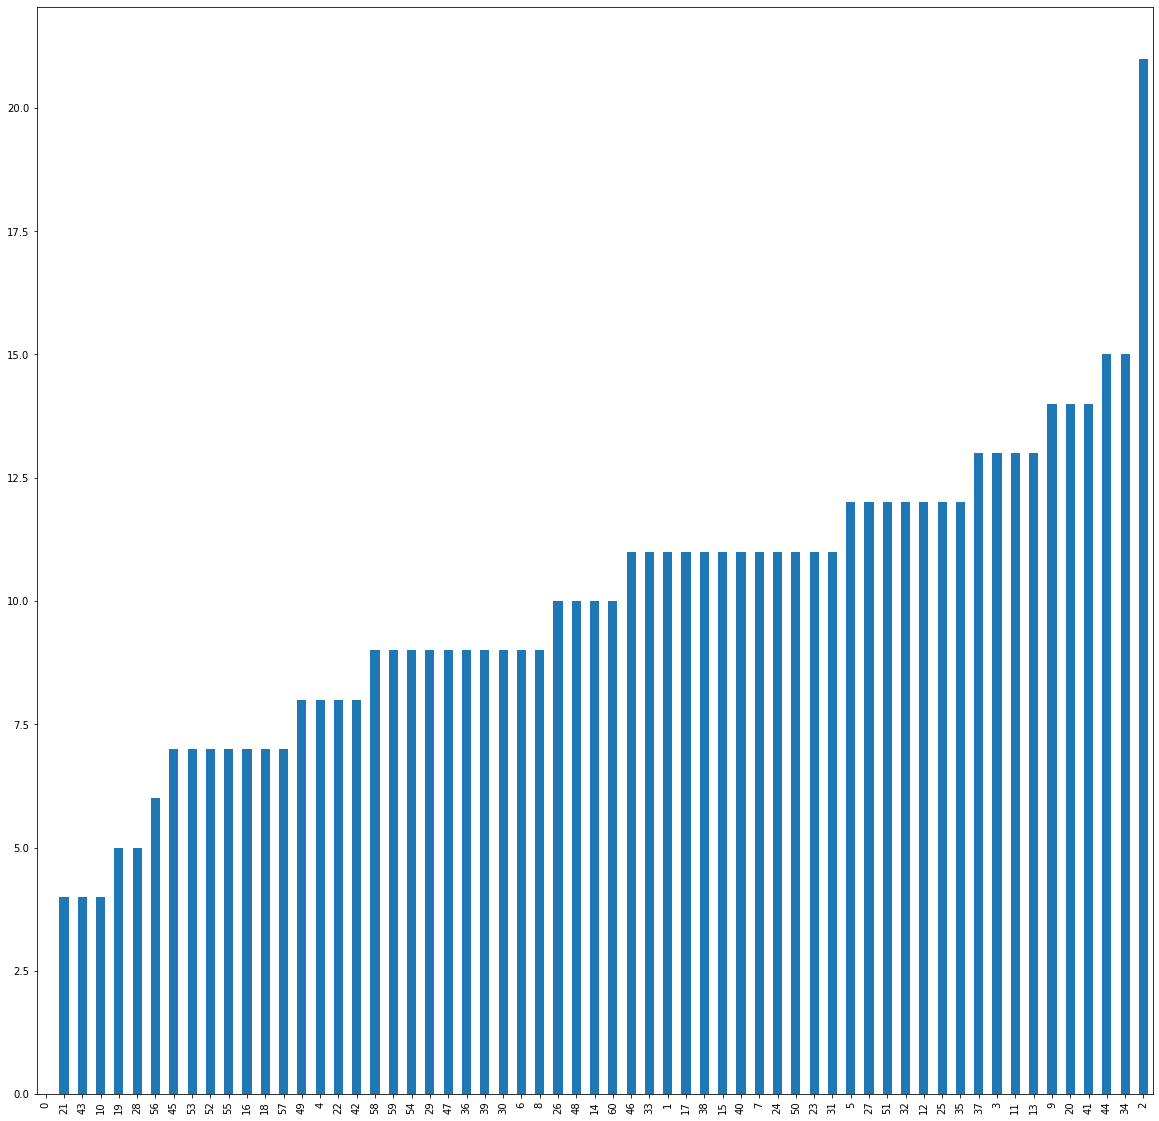

In [44]:
sorteddf['y'].plot(kind="bar",figsize=(20, 20))

In [38]:
sorteddf.tail(6) # most frequent

,x,y
9,9,14
20,20,14
41,41,14
44,44,15
34,34,15
2,2,21


In [39]:
sorteddf.head(7) # least frequent

,x,y
0,0,0
21,21,4
43,43,4
10,10,4
19,19,5
28,28,5
56,56,6


<AxesSubplot:>

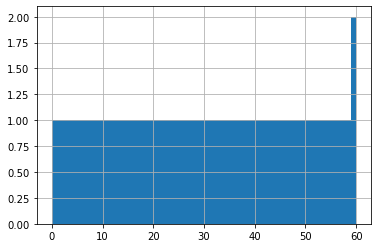

In [42]:
sorteddf["x"].hist(bins=60)